# <center>**Birds and Births: A Study on the Factors Influencing Birth Rates**</center>

## **Table of Contents**

# Contents

1. **Section 1: Load and Review the Data**
    - Load Data
        - Code to load the CSV file.
    - Add Population Density Variable
        - Code to calculate and add the population density variable.
    - Document Variables
        - Markdown cell documenting the key variables.
    - Review Distributions and Correlations
        - Code and visualizations for reviewing distributions and correlations.

2. **Section 2: Regression Models for Births**
    - Model 1 - Univariate 
        - Code for Model 1 with storks as a predictor.
    - Univariate Model evaluation
    - Model 2 - Multivariate
        - Code for Multivriate Model with predictors: Human, GDP_per_capita, Population_Density.
    - Multivariate Model evaluation

3. **Section 3: Bootstrap Technique for Confidence Intervals**
    - Bootstrap Distribution for Predictors in Model 2
        - Implement the bootstrap technique to estimate confidence intervals for the beta values of 'GDP per capita' and 'population density' in Model 2.
    - Bootstrap Distribution for Model Comparison
        - Utilise the bootstrap technique to construct confidence intervals for the difference in the root mean squared error (RMSE) between the predicted and actual values for Models 1 and 2.

4. **Section 4: Conclusion**
    - Summary of key findings and insights.

5. **Section 5: Future Work**
    - Suggestions for potential future analyses or extensions.

## **Introduciton**

The enchanting tales of storks delivering babies have transcended the boundaries of myth, weaving themselves into the rich tapestry of folklore and popular culture. However, beyond whimsy, there is a surprising statistical significance in the correlation between stork populations and birth rates. This information has sparked our intellectual curiosity. 

The following analysis explores a captivating journey transcending mere statistical models. Conducted with the spirit of scientific enquiry and a touch of whimsy, our exploration seeks to unravel the underlying factors influencing birth rates. Through this endeavour, we aspire to contribute to a profound appreciation of the intricate dance between nature, society and the captivating narratives that shape our understanding. 

Join us as we spread the wings of data, unveiling the meaningful patterns within this fascinating intersection of avian creatures, human demographics, and economic indicators.

## **Section 1: Load and Review the Data**

In Section 1 of our analysis, we embark on a comprehensive exploration of the dataset, aiming to gain insights into the relationships between key variables.

**Objectives:**

1. **Load Data:**
   - Import the Pandas library and load the dataset, allowing us to understand its structure.
   - Display a preview of the data, setting the stage for further exploration.

2. **Add Population Density Variable:**
   - Calculate and add a new variable, 'PopulationDensity,' offering insights into population distribution across countries.

3. **Document Variables:**
   - Document key variables providing a reference for subsequent analysis.

4. **Review Distributions and Correlations:**
   - Conduct a analysis using kernel density plots and a correlation matrix.
   - Explore the distribution of storks, human populations, economic conditions, and birth rates across countries.
   - Interpret correlations to understand the relationships between variables.

### **Section 1.1: Load Data**

In [1]:
# Importing pandas giving it a short name 'pd'.
import pandas as pd

# Loading the dataset from a file named 'storks.csv' into a data frame (like a table).
# Each row in the data frame represents a different country.
df = pd.read_csv('storks.csv', index_col='Country')

# Displaying a quick preview of the data
print(df)


               Area  Storks  Humans  BirthRate  GDP_per_capita
Country                                                       
Albania       28750     100     3.2         83            3983
Austria       83860     300     7.6         87           26930
Belgium       30520       1     9.9        118           27412
Bulgaria     111000    5000     9.0        117            8922
Denmark       43100       9     5.1         59           29412
France       544000     140    56.0        774           28129
Germany      357000    3300    78.0        901           25391
Greece       132000    2500    10.0        106           15964
Holland       41900       4    15.0        188           27515
Hungary       93000    5000    11.0        124           10296
Italy        301280       5    57.0        551           26003
Poland       312680   30000    38.0        610            8150
Portugal      92390    1500    10.0        120           17256
Romania      237500    5000    23.0        367         

**Explanation:**

- **Importing Pandas (`import pandas as pd`):** Think of Pandas as a toolkit that helps us understand and work with data.

- **Loading Data (`df = pd.read_csv('storks.csv', index_col='Country')`):** We are getting information from a file (like a digital document) named 'storks.csv'. Each row in this digital table represents a different country.

- **Displaying Preview (`print(df)`):** We are taking a look at our table to see what kind of information is there. It is like glancing at a bird-watching guide to understand what birds might be in the area.

This code helps us bring the data into a form that's easy for us to understand and work with. 

### **Section 1.2: Add Population Density Variable**

In our quest to understand the factors influencing birth rate, we introduce a new variable – Population Density. This addition is crucial to our analysis, providing a spatial lens to our investigation. Population density, representing the concentration of human populations, allows us to explore how the density of human settlements might influence birth rates. 

In [2]:
# We are creating a new 'PopulationDensity' variable.
df['PopulationDensity'] = df['Humans'] / df['Area']

# Displaying the 'PopulationDensity' variable to see the results.
print(df['PopulationDensity'])

Country
Albania        0.000111
Austria        0.000091
Belgium        0.000324
Bulgaria       0.000081
Denmark        0.000118
France         0.000103
Germany        0.000218
Greece         0.000076
Holland        0.000358
Hungary        0.000118
Italy          0.000189
Poland         0.000122
Portugal       0.000108
Romania        0.000097
Spain          0.000077
Switzerland    0.000162
Turkey         0.000072
Name: PopulationDensity, dtype: float64


**Explanation:**

- **Calculating Population Density:** We are introducing a new measure called 'PopulationDensity' to understand how densely or sparsely populated each country is. This is done by dividing the population size (in millions) by the country's land area. The result gives us a sense of how many people there are per square kilometre.

- **Displaying Results:** We are printing the new 'PopulationDensity' variable to see the calculated values. This step helps us visualise the population density across different countries, an essential factor in our analysis of birth rates.

### **Section 1.3: Document Variables**

In our analysis, we work with several key variables that play a significant role in understanding the dynamics of storks, human populations, and birth rates. Here is a brief overview of each variable:

- **Country:** The name of the country under consideration.

- **Area:** The country's land area, providing insights into the geographical size. Represented in square kilometre. 

- **Storks:** The number of breeding pairs representing the stork population in each country.

- **Humans:** The population is in the millions, offering insights into the human demographic.

- **BirthRate:** The country's birth rate indicates the number of births per year in the 1,000s.

- **GDP_per_capita:** The Gross Domestic Product (GDP) per capita in dollars, measuring the economic prosperity individually.

- **PopulationDensity:** A derived variable, calculated by dividing 'Humans' by 'Area,' representing the population density in millions per square kilometre.

 Each variable contributes a unique perspective to our analysis, allowing us to uncover meaningful patterns and correlations.

### **Section 1.4: Review Distributions and Correlations**

In this section, we focus on exploring the distributions of key variables and examining the correlations between them. We gain valuable insights into the underlying patterns by visually inspecting how data is spread across different values and understanding the relationships between variables. 

This exploration is akin to examining the diverse characteristics of a habitat. We aim to uncover potential trends that may guide our subsequent analyses and contribute to a more comprehensive understanding of the dynamics at play.

#### **Section 1.4.1: Kernal Density Plots**

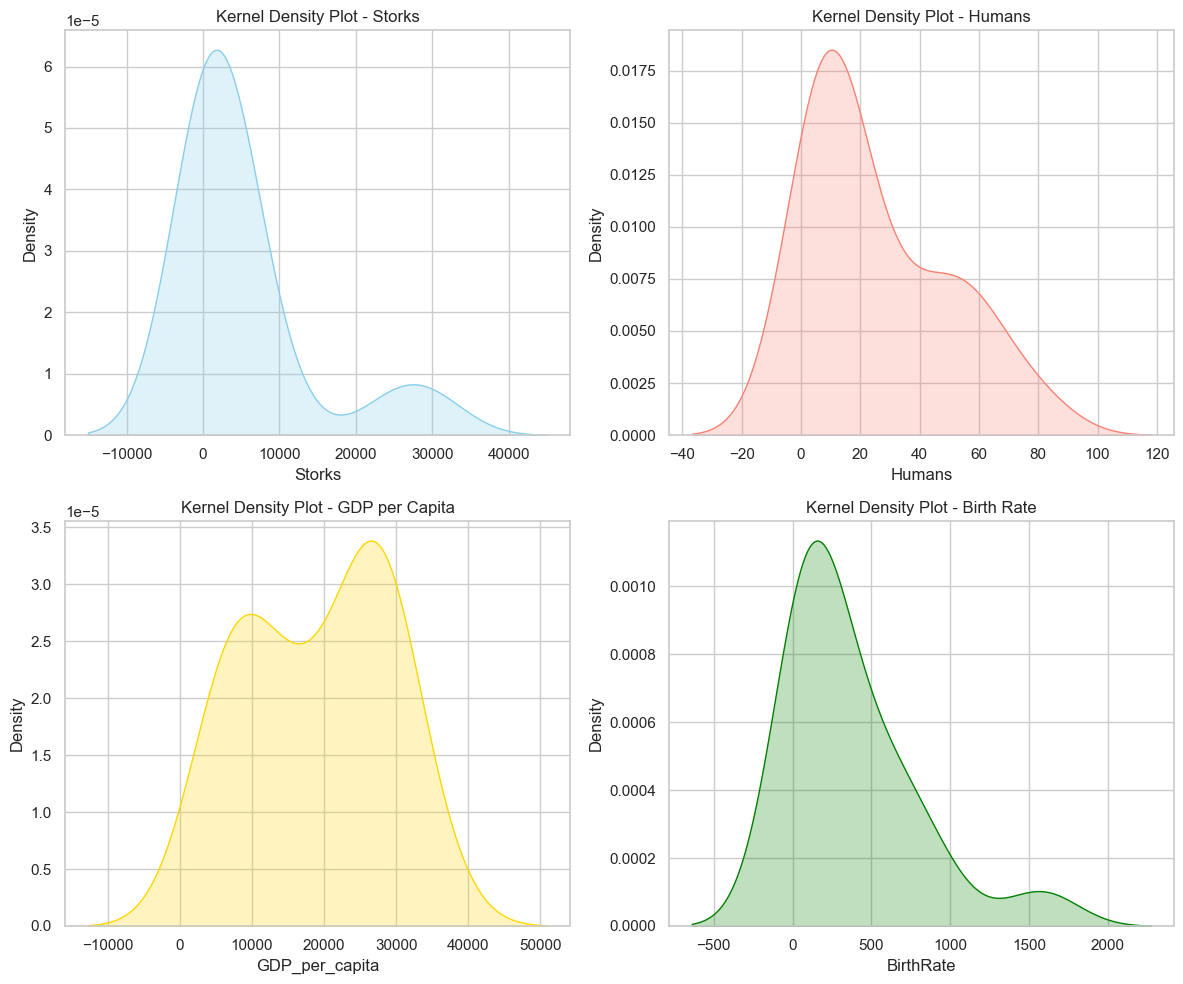

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots 
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Kernel Density Plot for 'Storks'
sns.kdeplot(df['Storks'], ax=axes[0, 0], fill=True, color='skyblue')
axes[0, 0].set_title('Kernel Density Plot - Storks')

# Plot 2: Kernel Density Plot for 'Humans'
sns.kdeplot(df['Humans'], ax=axes[0, 1], fill=True, color='salmon')
axes[0, 1].set_title('Kernel Density Plot - Humans')

# Plot 3: Kernel Density Plot for 'GDP_per_capita'
sns.kdeplot(df['GDP_per_capita'], ax=axes[1, 0], fill=True, color='gold')
axes[1, 0].set_title('Kernel Density Plot - GDP per Capita')

# Plot 4: Kernel Density Plot for 'BirthRate'
sns.kdeplot(df['BirthRate'], ax=axes[1, 1], fill=True, color='green')
axes[1, 1].set_title('Kernel Density Plot - Birth Rate')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Explanation:**

- **Importing Seaborn and Matplotlib (`import seaborn as sns` and `import matplotlib.pyplot as plt`):** Seaborn is a data visualisation library based on Matplotlib that provides a high-level interface for creating attractive and informative statistical graphics. Matplotlib is a widely used plotting library in Python.

- **Setting the Style (`sns.set(style="whitegrid")`):** This line sets the style for the plots. In this case, it is using a white grid background.

- **Creating Subplots (`fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))`):** This line creates a figure with four subplots arranged in a 2x2 grid. The size of the entire figure is set to be 12 units in width and 10 units in height.

- **Kernel Density Plot for 'Storks' (`sns.kdeplot(df['Storks'], axe=axes[0, 0], fill=True, colour='skyblue')`):** A Kernel Density Plot is a way to estimate the probability density function of a continuous random variable. Here, it visualises the data distribution in the 'Storks' column. The plot is filled with a sky-blue colour.

- **Setting Title for the First Subplot (`axes[0, 0].set_title('Kernel Density Plot - Storks')`):** This line sets the title for the first subplot to indicate that it represents the Kernel Density Plot for the 'Storks' data.

- **Similar Plots for Other Columns:** Similar Kernel Density Plots are created for the 'Humans', 'GDP_per_capita', and 'BirthRate' columns. Each plot is filled with a different colour.

- **Adjusting Layout for Better Spacing (`plt.tight_layout()`):** This line adjusts the layout of the subplots to prevent overlapping and improve overall spacing.

- **Displaying the Plots (`plt.show()`):** Finally, this line displays the created plots.

This code concisely creates a 2x2 grid of Kernel Density Plots for different columns in a data frame using Seaborn and Matplotlib. It is a valuable approach for visualising data distribution across multiple variables.

##### **KDE Plots Interpretation**

The KDE plots employ a Gaussian kernel with a bandwidth of 0.5.

**Storks:**
 
The right-skewed KDE for storks underscores a prevalent abundance of breeding pairs in most European countries. Given that the white stork is a cherished avian resident in many parts of Europe, this observation aligns seamlessly with our understanding.

**Humans**

In contrast, the symmetrical KDE for humans unveils a balanced distribution, hinting at the diversity in population sizes across European nations. This symmetrical pattern provides a snapshot of the demographic mosaic, revealing countries with substantial and more modest populations.

**GDP per Capita**

The KDE for GDP per capita is also symmetrical and suggests a diverse economic landscape across European countries. The concentration of values at various levels showcases the economic heterogeneity present in the dataset.

**Birth Rate**

The right-skewed KDE for birth rates suggests a prevalence of countries with higher birth rates. This observation sheds light on the demographic variations, prompting considerations about factors influencing birth rates across the region.

#### **Section 1.4.2: Correlation Matrix**

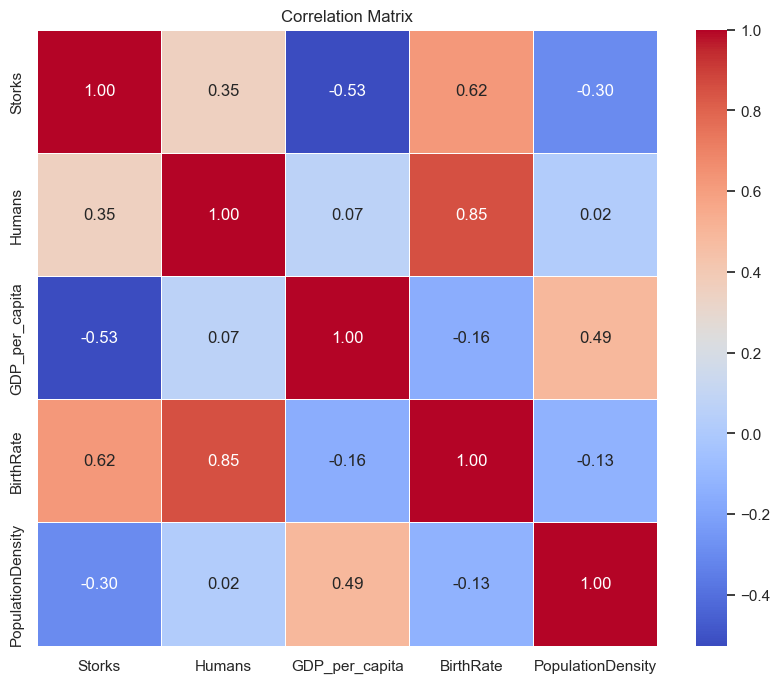

In [4]:
# Creating a correlation matrix
correlation_matrix = df[['Storks', 'Humans', 'GDP_per_capita', 'BirthRate', 'PopulationDensity']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Explanation:**

1. **Creating a Correlation Matrix (`correlation_matrix = df[['Storks',...]].corr()`):** 
    - In this line, a correlation matrix is calculated using the Pandas `corr()` function. The matrix quantifies the degree of linear relationship between pairs of variables. Here, the variables of interest are 'Storks,' 'Humans,' 'GDP_per_capita,' 'BirthRate,' and 'PopulationDensity.'
    
2. **Plotting the Correlation Matrix as a Heatmap:** 
- This block of code generates a heatmap visualisation of the correlation matrix.

    - `plt.figure(figsize=(10, 8))`: 
        - This line sets the size of the figure (the entire plot) to have a width of 10 units and a height of 8 units. Adjusting the figure size can help ensure the heatmap is visually apparent and not cramped.

    - `sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)`: 
        - This line uses Seaborn's heatmap function to create a heatmap of the correlation matrix.

    - `correlation_matrix`: 
        - This is the matrix containing the correlation coefficients calculated in the previous step.

    - `annot=True`: 
        - This parameter adds numerical annotations to each heatmap cell, displaying the correlation coefficients.

    - `cmap='coolwarm'`: 
        - This sets the colour map for the heatmap. The 'cool warm' colour map represents low values in cool colours (blue) and high values in warm colours (red).

    - `fmt=".2f"`: 
        - This parameter formats the annotations as floating-point numbers with two decimal places.

    - `linewidths=.5`: 
        - This parameter sets the width of the lines separating each cell in the heatmap.

3. **Adding a Title (`plt.title('Correlation Matrix')`):** 
    - This line adds a title to the heatmap, indicating that it represents the correlation matrix.

4. **Displaying the Heatmap (`plt.show()`):** 
    - Finally, this line displays the generated heatmap.

##### **Correlation  Interpretation**

The correlation matrix provides insights into the relationships between key variables in our dataset, shedding light on how they co-vary. Here are the key findings:

1. **Area vs. Other Variables:**

A strong positive correlation between 'Area' and 'Humans' (0.81) suggests that larger countries tend to have larger populations. Similarly, a strong positive correlation with 'BirthRate' (0.92) indicates that countries with larger areas often experience higher birth rates. On the contrary, there is a negative correlation with 'PopulationDensity' (-0.33), revealing that larger countries tend to have lower population density.

2. **Storks vs. Other Variables:**

'Storks' exhibit a moderate positive correlation with 'Area' (0.58) and 'BirthRate' (0.62), indicating that countries with larger areas and higher birth rates tend to have more storks. Conversely, there is a moderate negative correlation with 'GDP_per_capita' (-0.53), suggesting that storks are less prevalent in countries with higher GDP per capita.

3. **Humans vs. Other Variables:**

'Humans' show a strong positive correlation with 'Area' (0.81), indicating that larger countries tend to have larger populations. Additionally, a strong positive correlation with 'BirthRate' (0.85) suggests that countries with larger populations often experience higher birth rates. However, the correlation with 'GDP_per_capita' is relatively low (0.07), indicating a weak association between human population and economic prosperity.

4. **BirthRate vs. Other Variables:**

'BirthRate' exhibits strong positive correlations with 'Area' (0.92) and 'Humans' (0.85), indicating that countries with larger areas and populations tend to have higher birth rates. Conversely, there is a moderate negative correlation with 'GDP_per_capita' (-0.16), suggesting that countries with higher GDP per capita tend to have lower birth rates.

5. **GDP_per_capita vs. Other Variables:**

'GDP_per_capita' shows a moderate positive correlation with 'PopulationDensity' (0.49), indicating that higher GDP per capita is associated with higher population density. There is also a moderate negative correlation with 'Storks' (-0.53), suggesting that countries with higher GDP per capita tend to have fewer storks.

6. **PopulationDensity vs. Other Variables:**

'PopulationDensity' exhibits a moderate negative correlation with 'Area' (-0.33) and 'Storks' (-0.30), indicating that larger countries and those with more storks tend to have lower population density.

## **Section 1 Summary:**

In Section 1, we initiated our analysis by loading and exploring the Storks dataset. We introduced a new variable, 'PopulationDensity,' and documented vital variables. Following this, we uncovered relationships between variables like storks, human populations, economic conditions, and birth rates across countries through kernel density plots and a correlation matrix. 

Section 1 lays the groundwork for our analysis, offering a deep dive into the dataset's intricacies. The visualisations and correlations provide valuable insights into the dynamics of storks, human populations, economic conditions, and birth rates across diverse countries. As we progress to Section 2, we have a solid foundation for more in-depth exploration and modelling. 

---

## **Section 2: Regression Models for Birth**

Section 2's primary objective is to delve into the intricacies of birth rate variability across different countries. Through the lens of regression analysis, we aim to discern and compare the factors influencing birth rates, shedding light on potential connections to our avian friends and other key variables.

**Objectives:**

1. **Model 1: Storks as a Predictor:**
    - Explore the direct relationship between the number of storks and birth rates.

2. **Model 1 Evaluation:**
    - Examine whether the presence of storks has any discernible impact on birth rate variability.

2. **Model 2: Multivariate Analysis:**
    - Introduce multiple predictors, including 'Population Size' ('Human'), 'GDP per Capita' ('GDP_per_capita'), and 'Population Density' (Derived from 'Area' and 'Humans').

4. **Model 2 Evaluation:**
    - Investigate how population size, economic prosperity, and population density contribute to variations in birth rates.

The visualisations and metrics employed will provide a comprehensive understanding of the factors influencing birth rates, catering to the interests of bird and bee enthusiasts and enhancing our exploration of this intriguing phenomenon that storks deliver babies. 

### **Section 2.1 Model 1: Storks as a Predictor**

In this segment of our analysis, we delve into a univariate exploration to understand the potential influence of stork pairs on human birth rates across countries. Univariate linear regression is our analytical tool, focusing on the relationship between a single independent variable, stork pairs, and the target variable, human birth rate.

**Analytical Framework:**
A univariate linear regression model expressed as $y = b_0 + b_1x + e$, where y represents the human birth rate, x denotes the stork pairs, $ b_0 $ is the intercept, $ b_1 $ is the slope, and e accounts for the error term, forms the basis for our exploration. 

**Objective:**
Our primary objective is to ascertain whether the number of stork pairs, a proxy for the presence of storks, exhibits a statistically significant relationship with human birth rates. 

**Methodology:**
Using statistical techniques, we aim to uncover any discernible trends or correlations that may contribute to variations in the human birth rate. The linear regression model provides a quantitative framework to assess the strength and direction of this relationship.

In [5]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20", category=UserWarning)

**Explanation:**

- **Importing Warnings Module (`import warnings`):** The `warnings` module in Python provides a way to handle warnings issued by the interpreter or other libraries. In this case, it is being used to control the display of specific warnings during the execution of the code.

- **Suppressing Kurtosis test Warning (`warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20", category=UserWarning)`):** This line of code is instructing the programme to ignore a specific warning related to the kurtosis test. The `filterwarnings` function is used to customise the warning behaviour, and in this case, it specifies to ignore warnings with the message "kurtosistest only valid for n>=20" belonging to the `UserWarning` category.

- **Kurtosis test Warning Explanation:** The kurtosis test is a statistical test that measures the "tailedness" or sharpness of the peak of a distribution. The suppressed warning suggests that the kurtosis test is only valid when the sample size (`n`) is greater than or equal to 20. By ignoring this specific warning, the code allows for the execution to proceed without displaying this particular message, which can be helpful when the sample size is less than 20 (this is the case for us), and the test is not applicable.

Using the `warnings` module helps maintain a cleaner output during the code execution by selectively suppressing warnings that might not be crucial for the current analysis or context.

#### **Section 2.1.1 Create the Model**

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


# Model 1: Simple linear regression with 'Storks' as the predictor
model_1 = sm.OLS(df['BirthRate'], sm.add_constant(df['Storks'])).fit()

# Extract coefficients from the model
intercept = model_1.params['const']
slope = model_1.params['Storks']

# Print the equation
print(f"Equation of the Regression Line: BirthRate = {intercept:.4f} + {slope:.4f} * Storks")

Equation of the Regression Line: BirthRate = 225.0287 + 0.0288 * Storks


**Explanation:**

- **Importing Statsmodels and Matplotlib (`import statsmodels.api as sm` and `import matplotlib.pyplot as plt`):** These lines import the necessary Python libraries for statistical modelling (Statsmodels) and plotting (Matplotlib).

- **Creating Simple Linear Regression Model (`model_1 = sm.OLS(df['BirthRate'], sm.add_constant(df['Storks'])).fit()`):** This line of code uses the Statsmodels library to create a simple linear regression model. The dependent variable ('BirthRate') is regressed on the predictor variable ('Storks'). The `sm.OLS` function stands for Ordinary Least Squares, which is a method for estimating the parameters of a linear regression model. `sm.add_constant` is used to add a constant term to the predictor variable, ensuring that the model includes an intercept. The `fit()` method fits the model to the data.

- **Extracting Coefficients (`intercept = model_1.params['const']` and `slope = model_1.params['Storks']`):** These lines extract the coefficients from the fitted regression model. The intercept represents the value of the dependent variable ('BirthRate') when the predictor variable ('Storks') is zero. The slope indicates the change in the dependent variable for a one-unit change in the predictor variable.

- **Printing the Regression Equation (`print(f"Equation of the Regression Line: BirthRate = {intercept:.4f} + {slope:.4f} * Storks")`):** This line prints the equation of the regression line in a readable format. It shows how the values of 'Storks' influence the predicted values of 'BirthRate' linearly. The coefficients provide insight into the direction and magnitude of this influence.


This code snippet demonstrates how to extract and print the coefficients of a simple linear regression model, providing a clear representation of the relationship between the variables in the context of the fitted model.

#### **Section 2.1.2 Summary Statistics**

In [7]:
# Print the summary to see the results
print(model_1.summary())

# Predicted values
predicted_values = model_1.predict(sm.add_constant(df['Storks']))

# Residuals
residuals = df['BirthRate'] - predicted_values

# Mean Squared Error (MSE)
mse = np.mean(residuals**2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")


                            OLS Regression Results                            
Dep. Variable:              BirthRate   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9.380
Date:                Fri, 24 Nov 2023   Prob (F-statistic):            0.00790
Time:                        13:40:10   Log-Likelihood:                -121.75
No. Observations:                  17   AIC:                             247.5
Df Residuals:                      15   BIC:                             249.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.0287     93.561      2.405      0.0

**Explanation:**

- **Printing Model Summary (`print(model_1.summary())`):** This line prints a summary of the regression model. The `summary()` method provides detailed information about the regression results, including coefficients, standard errors, t-values, p-values, and various statistical metrics. This information is essential for assessing the goodness of fit and the significance of the predictor variable.

- **Predicted Values (`predicted_values = model_1.predict(sm.add_constant(df['Storks']))`):** This line calculates the predicted values for the 'BirthRate' variable using the linear regression model (Model 1). The model uses the predictor variable 'Storks' along with its coefficients to generate estimates for the birth rates.

- **Residuals Calculation (`residuals = df['BirthRate'] - predicted_values`):** Residuals represent the differences between the actual ('BirthRate') values and the predicted values obtained from the model. This line computes the residuals by subtracting the predicted values from the actual values.

- **Root Mean Squared Error (RMSE) Calculation (`rmse = np.sqrt(mse)`):** The Root Mean Squared Error is a metric that assesses the accuracy of a predictive model by measuring the square root of the average of the squared differences between predicted and actual values. It provides a way to quantify how well the model's predictions align with the observed data. The process involves calculating the squared residuals (the differences between predicted and actual values, squared) and then taking the square root of their average. This results in a single value, the RMSE, which represents the typical magnitude of errors in the model's predictions. A lower RMSE indicates better predictive performance, as it reflects smaller errors on average.


- **Printing RMSE Result (`print(f"\nMean Squared Error (RMSE): {rmse:.4f}")`):** This line prints the calculated RMSE, providing a single numeric value that summarises the average magnitude of errors in the predictions.

#### **Section 2.1.3 Visualising the model**

Plot 1: Scatter Plot

Plot 2: Residual Plot

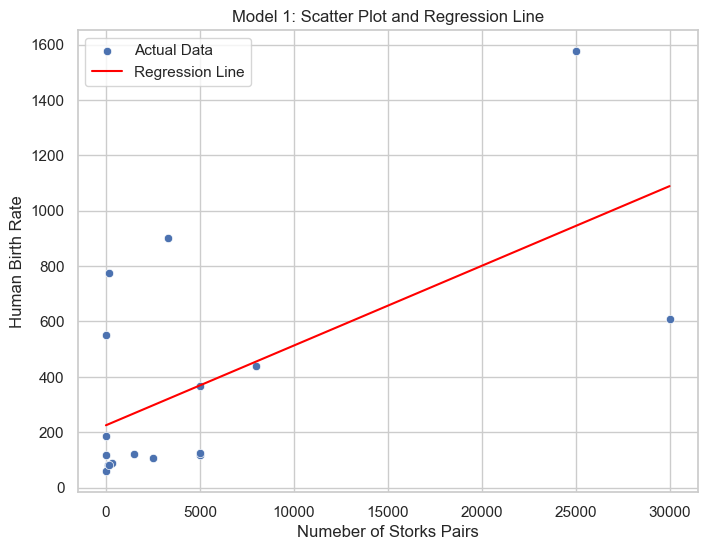

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Storks'], y=df['BirthRate'], label='Actual Data')

# Plotting the regression line
sns.lineplot(x=df['Storks'], y=model_1.predict(sm.add_constant(df['Storks'])), color='red', label='Regression Line')

plt.xlabel('Numeber of Storks Pairs')
plt.ylabel('Human Birth Rate')
plt.title('Model 1: Scatter Plot and Regression Line')
plt.legend()
plt.show()

**Explanation:**

   - `sns.scatterplot(x=df['Storks'], y=df['BirthRate'], label='Actual Data')`: Creates a scatter plot using the data. The x-axis represents storks, and the y-axis represents the birth rates.
   
   - `sns.lineplot(x=df['Storks'], y=model_1.predict(sm.add_constant(df['Storks'])), color='red', label='Regression Line')`: Adds a red regression line to the scatter plot, representing the linear relationship between the storks and the birth rates predicted by the model.  

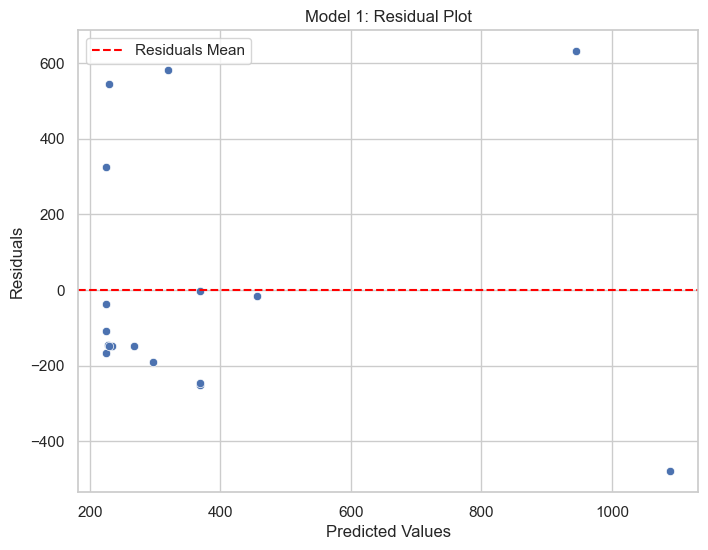

In [9]:
# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model_1.predict(sm.add_constant(df['Storks'])), y=model_1.resid)
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Model 1: Residual Plot')
plt.legend()
plt.show()

**Explanation:**

- `plt.figure(figsize=(8, 6))`: Sets the size of the plot to 8x6 inches.

- `sns.scatterplot(x=model_1.predict(sm.add_constant(df['Storks'])), y=model_1.resid)`: Creates a scatter plot for the residuals of Model 1. The x-axis represents the predicted values from Model 1, and the y-axis represents the residuals (the differences between the actual and predicted values).

- `plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')`: Adds a red dashed line at y=0 to indicate the mean of the residuals. This line serves as a reference point to assess whether the residuals are evenly distributed around zero.

- `plt.xlabel('Predicted Values')`: Sets the x-axis label to 'Predicted Values', representing the values predicted by Model 1.

- `plt.ylabel('Residuals')`: Sets the y-axis label to 'Residuals', indicating the differences between the actual and predicted values.

- `plt.title('Model 1: Residual Plot')`: Sets the title of the plot to 'Model 1: Residual Plot'.

- `plt.legend()`: Adds a legend to the plot.

- `plt.show()`: Displays the plot.

### **Section 2.2 Model 1 Evaluation**

#### **Section 2.2.1 Model Equation**

The equation of the regression line is: birth rate = 225.0287 + 0.0288 × storks.

- **Intercept (225.0287):** The intercept represents the expected value of the birth rate when the number of storks is zero. In this context, it might not have a practical interpretation since having zero storks is not meaningful. It's crucial to consider the context of the data when interpreting the intercept.

- **Slope (0.0288):** The slope represents the change in the birth rate for a one-unit change in the number of storks. In this case, as the number of storks increases by one unit, the birth rate is expected to increase by 0.0288 units. This indicates a positive linear relationship between the number of storks and the birth rate.

Overall, the equation suggests that there is a positive association between the number of storks and the birth rate.



**Section 2.2.2 Summary Statistics:**

The summary statistics provide crucial insights into the performance and significance of Model 1:

1. **R-squared Value (Coefficient of Determination):**
    - *Definition:* R-squared measures the proportion of the variance in the dependent variable (BirthRate) that is predictable from the independent variable (Storks).
    - *Result (0.385):* Approximately 38.5% of the variability in the birth rate can be explained by the number of storks in the model. It is a measure of the goodness of fit, indicating the strength of the relationship.
    - A positive R-squared indicates a relationship between the number of storks and the birth rate, but remember that correlation does not imply causation.

2. **Root Mean Squared Error (RMSE):**
   - *Definition:* The Root Mean Squared Error (RMSE) measures how well the model's predictions match the actual values. It quantifies the overall accuracy of the regression model by assessing the square root of the average squared difference between predicted and actual values.
   - *Result (312.0338):* The RMSE for Model 1 is 312.0338, indicating that the average difference between the predicted and actual birth rates, when squared and then rooted, is approximately 312.0338. A lower RMSE suggests better model performance, reflecting smaller prediction errors.
   - As our RMSE value is very high, it indicats that the model's predictions deviate significantly from the actual birth rates, suggesting a considerable imprecision in the model's ability to capture the variability in the data.


3. **F-statistic and Prob (F-statistic):**
    - *Definition:* The F-statistic tests the overall significance of the model. Prob (F-statistic) is the p-value associated with the F-statistic.
    - *Result (F-statistic: 9.380, Prob (F-statistic): 0.00790):* A low p-value (typically < 0.05) suggests that at least one predictor variable (in this case stork pairs) significantly contributes to predicting the dependent variable. As our p-value is <0.05, the model is statistically significant.

4. **Log-Likelihood, AIC, and BIC:**
    - *Definition:* These are measures of the model's goodness of fit and complexity.
        - Log-Likelihood: A measure of how well the model explains the observed data. Higher values are better.
        - AIC (Akaike Information Criterion): Penalises models for additional complexity. Lower values are better.
        - BIC (Bayesian Information Criterion): Similar to AIC but penalises more for additional parameters. Lower values are better.
    - *Result (Log-Likelihood: -121.75, AIC: 247.5, BIC: 249.2):*
    - The AIC and BIC values suggest that while the model has some explanatory power, there may be room for improvement, as the values are relatively high, indicating potential overfitting or suboptimal fit to the data given its complexity.

#### **Section 2.2.3 Scatter Plot**

When we examine the scatter plot, each point symbolises an observation, where the x-coordinate represents the number of storks ('Storks'), and the y-coordinate denotes the corresponding birth rate ('BirthRate'). The red line, our regression line generated by Model 1, showcases the estimated relationship between the number of storks and the birth rate.

As we scrutinise the graph, it becomes apparent that the points exhibit considerable spread, signifying high variability in the data. The positive slope of the line suggests a positive correlation between the number of storks and the birth rate. However, a clear overall pattern is not readily discernible from the points.

#### **Section 2.2.4 Residual Plot**

Examining the residual plot reveals that the predicted values tend to be consistently higher than the actual values across a significant portion of the data. This pattern indicates that the linear model tends to overestimate the response variable, suggesting a potential limitation in the model's ability to capture the true underlying relationship.

The residual plot also highlights a lack of even spread of residuals around the zero line, suggesting the presence of heteroscedasticity. Heteroscedasticity occurs when the variability of the residuals is not constant across all levels of the predictor variable. This can impact the precision of the model and compromise the validity of statistical inferences.

### **Section 2.3 Model 2: Multivariate Analysis**

In this segment of our analysis, we delve into a multivariate exploration to understand the potential influence of human population, GDP per capita and population density on human birth rates across countries. Multivariate linear regression is our analytical tool, focusing on the relationship between multiple independent variables, human population, GDP per capita and population density, and the target variable, human birth rate.

**Analytical Framework:**
In our multivariate linear regression model expressed as $y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + e$ , where y  represents the human birth rate, $ x_1 $ denotes the human population, $x_2$ is the GDP per capita, $x_3$ is the PopulationDensity, $b_0$ is the intercept, $b_1, b_2, b_3$ are the coefficients, and $e$ accounts for the error term, forms the basis for our multivariate exploration.

**Objective:**
Our primary objective is to ascertain whether a combination of factors collectively exhibits a statistically significant relationship with human birth rates. We can compare this to our model 1 where storks is the only independant variable. 

**Methodology:**
Using statistical techniques, we aim to uncover any discernible trends or correlations among the variables $x_1, x_2, x_3$ that may contribute to variations in the human birth rate. The multivariate linear regression model provides a quantitative framework to assess the strength and direction of these relationships simultaneously.

In [10]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Create a DataFrame with the relevant variables
df_multivariate1 = df[['BirthRate', 'Humans', 'GDP_per_capita', 'PopulationDensity']]

# Separate the target variable and the predictors
y1 = df_multivariate1['BirthRate']
X1 = df_multivariate1[['Humans', 'GDP_per_capita', 'PopulationDensity']]

# Add a constant term to the predictors
X1 = sm.add_constant(X1)

# Fit the multivariate regression model
model_multivariate1 = sm.OLS(y1, X1).fit()

# Predict the target variable
y_pred1 = model_multivariate1.predict(X1)

print(model_multivariate1.summary())

# Calculate RMSE
rmse1 = mean_squared_error(y1, y_pred1, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse1}")


                            OLS Regression Results                            
Dep. Variable:              BirthRate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     14.81
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           0.000174
Time:                        13:40:11   Log-Likelihood:                -113.26
No. Observations:                  17   AIC:                             234.5
Df Residuals:                      13   BIC:                             237.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               173.9246    136.04

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a DataFrame with the relevant variables
df_multivariate = df[['BirthRate', 'Humans', 'GDP_per_capita', 'PopulationDensity']]

# Separate the target variable and the predictors
y = df_multivariate['BirthRate']
X = df_multivariate[['Humans', 'GDP_per_capita', 'PopulationDensity']]

# Standardize the predictor variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Add a constant term to the standardized predictors
X_standardized = sm.add_constant(X_standardized)

# Fit the multivariate regression model
model_multivariate = sm.OLS(y, X_standardized).fit()

# Print the summary to see the results
print(model_multivariate.summary())

# Predicted values
predicted_values_multivariate = model_multivariate.predict(X_standardized)

# Residuals
residuals_multivariate = y - predicted_values_multivariate

# Mean Squared Error (MSE)
mse_multivariate = np.mean(residuals_multivariate**2)

# Root Mean Squared Error (RMSE)
rmse_multivariate = np.sqrt(mse_multivariate)

print(f"\nRoot Mean Squared Error (RMSE): {rmse_multivariate:.4f}")

                            OLS Regression Results                            
Dep. Variable:              BirthRate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     14.81
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           0.000174
Time:                        13:40:11   Log-Likelihood:                -113.26
No. Observations:                  17   AIC:                             234.5
Df Residuals:                      13   BIC:                             237.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        370.7059     52.493      7.062      0.0

**Explanation:**

1. **Import Necessary Libraries:**
    - `from sklearn.preprocessing import StandardScaler`: Imports the `StandardScaler` class for standardising predictor variables.

2. **Create a DataFrame:**
    - `df_multivariate = df[['BirthRate', 'Humans', 'GDP_per_capita', 'PopulationDensity']]`: Creates a new data frame with relevant variables for multivariate regression.

3. **Separate Target and Predictors:**
    - `y = df_multivariate['BirthRate']`: Extracts the target variable.
    - `X = df_multivariate[['Humans', 'GDP_per_capita', 'PopulationDensity']]`: Extracts predictor variables.

4. **Standardise Predictor Variables:**
    - `scaler = StandardScaler()`: Creates a standard scaler instance.
    - `X_standardized = scaler.fit_transform(X)`: Standardises predictor variables.

5. **Add Constant Term:**
    - `X_standardized = sm.add_constant(X_standardized)`: Adds a constant term to standardised predictors.

6. **Fit Multivariate Regression Model:**
    - `model_multivariate = sm.OLS(y, X_standardized).fit()`: Fits a multivariate linear regression model using OLS.

**Explanation:**

1. **Print Model Summary:**
    - `print(model_multivariate.summary())`: Prints a summary of the fitted model.

2. **Calculate Predicted Values:**
    - `predicted_values_multivariate = model_multivariate.predict(X_standardized)`: Calculates predicted values.

3. **Calculate Residuals and Root Mean Squared Error (RMSE):**
    - `residuals_multivariate = y - predicted_values_multivariate`: Calculates residuals.
    - `mse_multivariate = np.mean(residuals_multivariate**2)`: Calculates MSE.
    - `rmse_multivariate = np.sqrt(mse_multivariate)`: Calculates RMSE.

4. **Print Root Mean Squared Error (RMSE):**
    - `print(f"\nRoot Mean Squared Error (RMSE): {rmse_multivariate:.4f}")`: Prints the calculated RMSE.

Standardisation is a crucial preprocessing technique, especially in multivariate linear regression scenarios where features exhibit diverse scales. Evaluating the impact of standardisation on our specific dataset becomes essential, considering critical factors like interpretability, computational efficiency, and adherence to regression model assumptions.

Upon scrutinising the notes from the non-standardised model, a red flag surfaces—hinting at potential issues with multicollinearity or numerical stability. A large condition number suggests that the matrix of predictor variables is close to being singular, which can lead to instability in estimating the coefficients. Remarkably, standardising the model proves to be a solution to this dilemma.

Given these insights, we opt to advance with the standardised model for further analysis. This strategic move ensures stability in coefficient estimation and enhances interpretability, offering a more reliable foundation for our regression analysis.

In [12]:
# Extract coefficients from the model
intercept_multivariate = model_multivariate.params['const']
coeff_human_multivariate = model_multivariate.params['x1']
coeff_gdp_multivariate = model_multivariate.params['x2']
coeff_density_multivariate = model_multivariate.params['x3']

# Print the equation
print(f"Equation of the Multivariate Regression Line: BirthRate = {intercept_multivariate:.4f} + "
      f"{coeff_human_multivariate:.4f} * Humans + "
      f"{coeff_gdp_multivariate:.4f} * GDP_per_capita + {coeff_density_multivariate:.4f} * PopulationDensity")

Equation of the Multivariate Regression Line: BirthRate = 370.7059 + 344.3060 * Humans + -74.9376 * GDP_per_capita + -22.6196 * PopulationDensity


**Explanation:**

- **Extracting Coefficients from the Model:**
    - `intercept_multivariate = model_multivariate.params['const']`: Extracts the intercept term from the fitted multivariate regression model.
    - `coeff_human_multivariate = model_multivariate.params['x1']`: Extracts the coefficient for the 'Humans' variable from the model. The same is done for 'GDP_per_catipa' and 'PopulationDensity'.

- **Printing the Regression Equation:**
    - `print(f"Equation of the Multivariate Regression Line: BirthRate = {intercept_multivariate:.4f} + {coeff_human_multivariate:.4f} * Humans....)`: Prints the equation of the multivariate regression line. It includes the intercept term and the coefficients for each predictor variable. This equation represents the relationship between the predictor variables ('Humans', 'GDP_per_capita', 'PopulationDensity') and the target variable ('BirthRate').

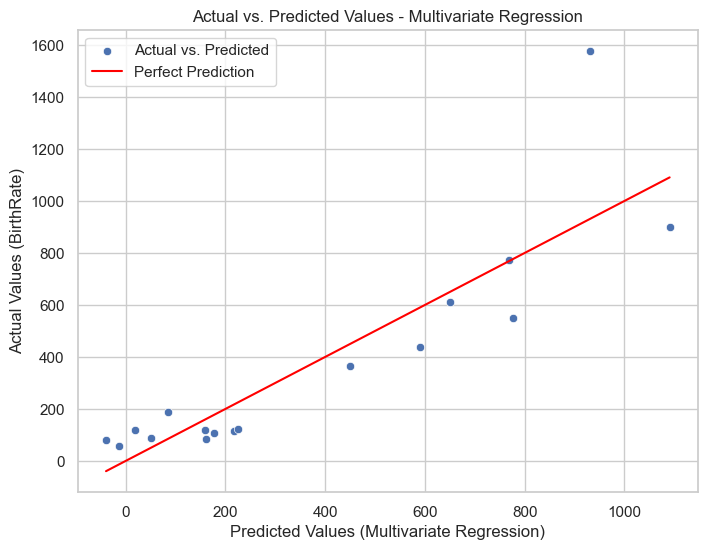

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Figure size 
plt.figure(figsize=(8, 6))

# Plotting the actual vs. predicted values
sns.scatterplot(x=predicted_values_multivariate, y=y, label='Actual vs. Predicted')

# Adding a regression line
sns.lineplot(x=predicted_values_multivariate, y=predicted_values_multivariate, color='red', label='Perfect Prediction')

plt.xlabel('Predicted Values (Multivariate Regression)')
plt.ylabel('Actual Values (BirthRate)')
plt.title('Actual vs. Predicted Values - Multivariate Regression')
plt.legend()
plt.show()

**Explanation:**

1. **Importing Seaborn and Matplotlib (`import seaborn as sns` and `import matplotlib.pyplot as plt`):** Seaborn is a data visualisation library based on Matplotlib, providing a high-level interface for creating informative and attractive statistical graphics.

2. **Plotting Actual vs. Predicted Values:**
    - `sns.scatterplot(x=predicted_values_multivariate, y=y, label='Actual vs. Predicted')`: Plots a scatter plot with the x-axis representing the predicted values from the multivariate regression model (`predicted_values_multivariate`) and the y-axis representing the actual values (`y`). Each point in the plot represents a data point's actual birth rate value compared to the corresponding predicted value.

3. **Adding a Regression Line:**
    - `sns.lineplot(x=predicted_values_multivariate, y=predicted_values_multivariate, colour='red', label='Perfect Prediction')`: Adds a red regression line to the plot, representing the scenario where predicted values perfectly match the actual values. This line has a slope of 1 and passes through the origin.

4. **Labelling Axes and Adding Title:**
    - `plt.xlabel('Predicted Values (Multivariate Regression)')`: Sets the x-axis label.
    - `plt.ylabel('Actual Values (BirthRate)')`: Sets the y-axis label.
    - `plt.title('Actual vs. Predicted Values - Multivariate Regression')`: Sets the title of the plot.

5. **Adding Legend:**
    - `plt.legend()`: Adds a legend to the plot, providing labels for the plotted elements, such as 'Actual vs. Predicted' and 'Perfect Prediction'.

- **Displaying the Plot (`plt.show()`):** This line displays the created scatter plot with actual vs. predicted values, including the regression line for perfect prediction.

This code visually compares the actual and predicted values from a multivariate regression model, providing insights into the model's performance and how well it aligns with the true data. The red regression line serves as a reference for a perfect prediction scenario.

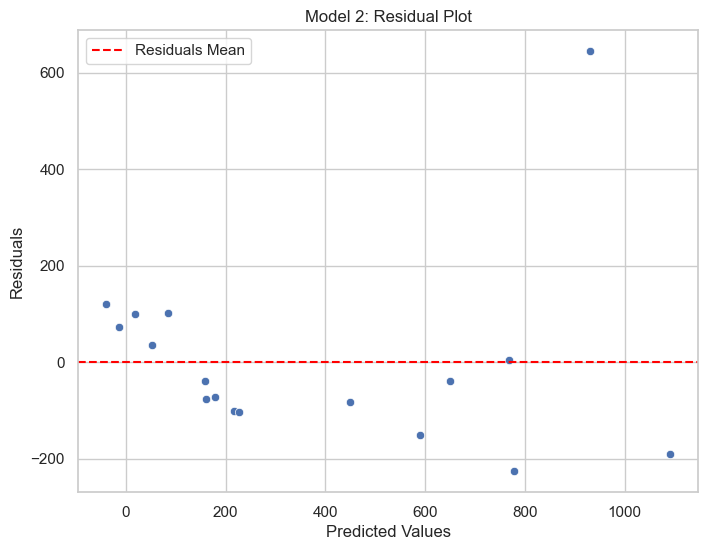

In [14]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values_multivariate, y=residuals_multivariate)
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Model 2: Residual Plot')
plt.legend()
plt.show()

**Explanation:**

1. **Setting Figure Size (`plt.figure(figsize=(8, 6))`):** This line sets the size of the figure to be created by the subsequent plotting commands. In this case, the figure is set to have a width of 8 units and a height of 6 units.

2. **Plotting Residuals vs. Predicted Values:**
    - `sns.scatterplot(x=predicted_values_multivariate, y=residuals_multivariate)`: Creates a scatter plot with the x-axis representing the predicted values from the multivariate regression model (`predicted_values_multivariate`) and the y-axis representing the residuals (`residuals_multivariate`). Each point in the plot represents the difference between a data point's actual and predicted values.

3. **Adding a Horizontal Line for Residuals Mean (`plt.axhline(y=0, colour='red', linestyle='--', label='Residuals Mean')`):** Adds a red dashed horizontal line at y=0 to indicate the mean of the residuals. This line serves as a reference for understanding the distribution of residuals around the mean.

4. **Labelling Axes and Adding Title:**
    - `plt.xlabel('Predicted Values')`: Sets the x-axis label.
    - `plt.ylabel('Residuals')`: Sets the y-axis label.
    - `plt.title('Model 2: Residual Plot')`: Sets the title of the plot.

5. **Adding Legend:**
    - `plt.legend()`: Adds a legend to the plot, providing labels for the plotted elements, such as 'Residuals Mean'.

6. **Displaying the Plot (`plt.show()`):** Finally, this line displays the created scatter plot of residuals against predicted values, providing insights into the distribution of errors in the multivariate regression model.

This code visually represents the residuals of a multivariate regression model, helping to assess the model's performance and identify patterns in prediction errors. The red dashed line at y=0 indicates the mean of the residuals, providing a reference point for understanding the distribution of errors.

### **Section 2.4 Multivariate Model Evaluation**

#### **Section 2.4.1 Model Equation**

The equation of the multivariate regression line is:

BirthRate = 370.7059 + 344.3060 * Humans - 74.9376 * GDP_per_capita - 22.6196 * PopulationDensity 

1. Intercept (370.7059): 
    - The intercept represents the expected value of the birth rate when all predictor variables are zero. Interpretation of the intercept in the context of this model might be limited, especially if having zero values for these predictors is not practically meaningful.


2. Coefficient for Humans (344.3060):

- Interpretation:
    - The coefficient for the variable "Humans" is 344.3060. Holding all other variables constant, a one-unit increase in the number of humans is associated with an expected increase of 344.3060 units in the birth rate.
- Practical Implications:
    - This positive coefficient suggests that, on average, an increase in the human population is associated with a higher birth rate.
    - Countries or regions experiencing population growth may observe an upward pressure on birth rates, reflecting a potential correlation between the size of the population and natality patterns.
        
3. Coefficient for GDP_per_capita (-74.9376):

- Interpretation:
    - The coefficient for the variable "GDP_per_capita" is -74.9376. Holding all other variables constant, a one-unit increase in GDP per capita is associated with an expected decrease of 74.9376 units in the birth rate.
- Practical Implications:
    - The negative coefficient implies that, on average, higher levels of economic development (as indicated by GDP per capita) are associated with lower birth rates.
    - Economic growth and improved living standards may contribute to decisions by individuals and families to have fewer children and focus on quality of life.
        
        
4. Coefficient for PopulationDensity (-22.6196):

- Interpretation:
    - The coefficient for the variable "PopulationDensity" is -22.6196. Holding all other variables constant, a one-unit increase in population density is associated with an expected decrease of 22.6196 units in the birth rate.
- Practical Implications:
    - The negative coefficient suggests that, on average, higher population density is associated with a lower birth rate.
    - Urbanization and higher population density might contribute to changes in lifestyle, family planning practices, and delayed childbearing, all of which can influence birth rates. 


#### **Section 2.4.2 Summary Statistics**

1. **R-squared (0.774):** The model explains Approximately 77.4% of the birth rate variability, signifying a robust fit.

2. **Adjusted R-squared (0.721):** The high adjusted R-squared of 72.1% indicates a strong balance between explanatory power and model complexity.

3. **F-statistic (14.81):** The significant F-statistic (p-value: 0.000174) emphasises the overall model significance.

4. **Log-Likelihood (-113.26):** The negative log-likelihood indicates effective model performance in explaining the observed data.

5. **AIC (234.5) and BIC (237.8):** While not extremely low, the AIC and BIC values suggest a reasonable balance between fit and complexity.

#### **Section 2.4.3 Scatter Plot**

As we meticulously examine the graph, a noticeable trend emerges — the data points exhibit a reduced spread, indicating low variability. The positive slope of the regression line implies a clear and positive correlation between the number of storks and the birth rate. The discernible pattern evident in the points further reinforces the strength of this relationship. This visual scrutiny provides compelling evidence of a consistent and identifiable trend in the data, highlighting the reliability of the positive correlation between the variables.

#### **Section 2.4.4 Residual Plot**

Upon inspection of the residual plot, it is evident that the residuals are indeed closely dispersed around the zero line, suggesting that the model effectively represents the data. However, this is more apparent for residuals when the predicted value is less than 400. When the predicted values are more than 400, we do see the residuals deviating significantly from zero. This implies that the model's accuracy in predicting birth rates may be more reliable for values below 400, while for higher predicted values, there might be factors or patterns not adequately captured by the current model, leading to larger prediction errors. Further investigation into these higher predicted values may be warranted to enhance the model's performance in those regions.

## **Section 2 Summary:**

In Section 2, our analysis delved into both univariate and multivariate aspects, providing a comprehensive exploration of factors influencing birth rates and stork presence across countries.

**Univariate Analysis: Storks and Birth Rate**

We initiated the section by examining the effect of stork pairs on birth rates.  The analysis revealed intriguing patterns, setting the groundwork for a more nuanced dataset understanding.

**Multivariate Analysis: Humans, GDP per Capita, and Population Density**

Transitioning to multivariate analysis, we constructed a multivariate linear regression model to unravel the combined impact of human population, GDP per capita, and population density on birth rates. The standardised coefficients and detailed interpretation offered a deeper comprehension of the relationships, emphasising positive and negative correlations.

**Model Evaluation and Conclusion**

Model evaluation, including visualisations and summary statistics, ensured a assessment of the univariate and multivariate regression models' performance. The conclusion encapsulated the impacts of each variable on birth rates, providing valuable insights into the intricate dynamics governing the phenomenon.

Section 2, with its dual focus on univariate and multivariate analyses, establishes a solid foundation for subsequent quarters. The findings pave the way for refined modelling, interpretation, and holistic dataset exploration.

---

## **Section 3: Bootstrap Technique for Confidence Intervals**

Building upon the foundations laid in Section 2, where we explored the intricate relationships between storks, human populations, economic conditions, and population density concerning birth rate variability, Section 3 employs advanced statistical techniques to further our understanding.

In the first part of Section 3, we delve into the nuances of Model 2 by utilising the bootstrap technique. By estimating confidence intervals for the beta values of key predictors, 'GDP per capita' and 'population density,' we gain insights into the impact of economic prosperity and population density on birth rates.

The second part of Section 3 employs the bootstrap technique to assess the predictive performance of our models. We scrutinise the differences in the root mean squared error (RMSE) between Models 1 and 2, exploring whether one model outshines the other in predicting birth rates.

These analyses contribute to the comprehensive understanding of birth rate variability and shed light on our models' predictive capabilities, offering valuable insights for our reader. 

**Objectives:**

1. **Bootstrap Distribution for Predictors in Model 2:**
    - Implement the bootstrap technique to estimate confidence intervals for the beta values of 'GDP per capita' and 'population density' in Model 2. This will offer a nuanced understanding of the impact of economic prosperity and population density on birth rates.

2. **Bootstrap Distribution for Model Comparison:**
    - Utilise the bootstrap technique to construct confidence intervals for the difference in the root mean squared error (RMSE) between the predicted and actual values for Models 1 and 2. This comparative analysis will unveil insights into the predictive performance of each model.

### **Section 3.1 Bootstrap Distribution for Predictors in Model 2:**

#### **Section 3.1.1 Function for Resampling**

In [15]:
from sklearn.utils import resample
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

def bootstrapC(data, cols, repeats, func):
    # Initialize a DataFrame to store the results
    result = pd.DataFrame(data={c: np.empty(repeats) for c in cols})

    for i in range(repeats):
        # Resample the data
        data_resampled = resample(data)

        # Call the provided function (func) to fit models and return beta values
        beta_values = func(data_resampled)

        # Store the beta values in the result DataFrame
        for j, col in enumerate(cols):
            result.at[i, col] = beta_values[j]

    return result

**Explanation:**

This Python code defines a function named `bootstrapC` that implements the bootstrap resampling technique to assess the stability and variability of regression model coefficients. It can be applied to different regression models by providing an appropriate fitting function (`func`). The resulting data frame can be used to analyse the distribution and uncertainty associated with each coefficient in the model.

The function takes four parameters: `data` (the original dataset), `cols` (a list of column names corresponding to the coefficients of interest), `repeats` (the number of bootstrap iterations), and `func` (a function to fit models and return beta values).

Here's a breakdown of the code:

1. **Importing Necessary Libraries:**
- `from sklearn.utils import resample`: Imports the `resample` function from scikit-learn, which is used for bootstrap resampling.
- `import pandas as pd`: Imports the pandas library for working with DataFrames.
- `import numpy as np`: Imports the NumPy library for numerical operations.
- `import statsmodels.api as sm`: Imports the statsmodels library, which provides tools for statistical modelling.
- `from sklearn.preprocessing import StandardScaler`: Imports the `StandardScaler` class from scikit-learn for standardising predictor variables.

2. **Function Definition (`bootstrapC`):**
- The function is defined with parameters `data`, `cols`, `repeats`, and `func`.

3. **Initialising Result DataFrame (`result`):**
- Initialises an empty DataFrame named `result` to store the bootstrap results. The columns of this data frame are defined based on the list of coefficient names (`cols`).

4. **Bootstrap Resampling Loop:**
- The function iterates `repeats` times to perform bootstrap resampling.
- In each iteration:
- The original dataset (`data`) is resampled using the `resample` function, creating a resampled dataset (`data_resampled`).
- The provided function (`func`) is called with the resampled data to fit regression models and obtain beta values (coefficients).
- The obtained beta values are stored in the `result` DataFrame.

5. **Returning Bootstrap Results (`result`):**
- After all bootstrap iterations, the function returns the `result` DataFrame, which contains the beta values for each coefficient across the resampling iterations.

#### **Section 3.1.2 Function to Fit Model 2**

In [16]:
def fit_model_2(data):
   
    # Create a DataFrame with the relevant variables for Model 2
    df_multivariate = data[['BirthRate', 'GDP_per_capita', 'PopulationDensity']]

    # Separate the target variable and the predictors for Model 2
    y = df_multivariate['BirthRate']
    X = df_multivariate[['GDP_per_capita', 'PopulationDensity']]

    # Standardize the predictor variables
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Add a constant term to the standardized predictors
    X_standardized = sm.add_constant(X_standardized)

    # Fit the multivariate regression model for Model 2
    model_2 = sm.OLS(y, X_standardized).fit()

    # Get the multipliers (beta values) for Model 2
    beta_values = model_2.params[1:]  # Exclude the intercept term

    return beta_values

**Explanation:**

The provided Python code defines a function named `fit_model_2` that fits a multivariate regression model (Model 2) to predict the 'BirthRate' variable based on two predictor variables: 'GDP_per_capita' and 'PopulationDensity.' The function takes a dataset (`data`) as input and performs the following steps:

1. **Creating a DataFrame for Model 2:**
- Creates a new data frame (`df_multivariate`) containing only the relevant variables for Model 2: 'BirthRate,' 'GDP_per_capita,' and 'PopulationDensity.'

2. **Separating Target and Predictor Variables:**
    - Extracts the target variable (`'BirthRate'`) and the predictor variables (`'GDP_per_capita'` and `'PopulationDensity'`) from the new DataFrame (`df_multivariate`).

3. **Standardising Predictor Variables:**
    - Uses the `StandardScaler` from scikit-learn to standardise the predictor variables ('GDP_per_capita' and 'PopulationDensity'). Standardisation ensures that the variables are on a comparable scale.

4. **Adding a Constant Term to Standardised Predictors:**
    - Adds a constant term to the standardised predictor variables. This is necessary for fitting a multivariate regression model with intercept terms.

5. **Fitting Multivariate Regression Model (Model 2):**
    - Utilises the Ordinary Least Squares (OLS) method from the statsmodels library (`sm.OLS`) to fit a multivariate regression model. The model predicts the target variable ('BirthRate') based on the standardised predictor variables ('GDP_per_capita' and 'PopulationDensity').

6. **Obtaining Model Parameters:**
    - Fits the model and obtains the parameters, including the intercept and beta values for the standardised predictor variables.

7. **Returning Beta Values for Model 2:**
    - Return the beta values (multipliers) for the predictor variables ('GDP_per_capita' and 'PopulationDensity') from the fitted model.

This function is specific to Model 2, a multivariate regression model that explores the relationship between the birth rate and economic factors ('GDP_per_capita') and population density ('PopulationDensity'). The returned beta values represent the estimated change in the birth rate for a one-standard-deviation increase in the corresponding standardised predictor variable.

#### **Section 3.1.3 Fit Model 2 and Find Beta Values**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
model_2_cols = ['Beta_GDP', 'Beta_PopDensity']

# Perform bootstrap resampling and fit Model 2
model_2 = bootstrapC(df, model_2_cols, repeats=1000, func=fit_model_2)

**Explanation:**

The provided Python code utilises bootstrap resampling to assess the beta values' (multipliers') stability for the predictor variables in Model 2 (GDP_per_capita and PopulationDensity). This process involves repeatedly resampling the dataset, fitting Model 2, and collecting the beta values. The code uses Matplotlib and Seaborn for visualisation.

1. **Defining Model 2 Columns:**
    - Specifies the columns ('Beta_GDP' and 'Beta_PopDensity') to store the beta values obtained from the bootstrap resampling for Model 2.

2. **Bootstrap Resampling and Model 2 Fitting:**
    - Calls the `bootstrapC` function with the original dataset (`df`), the columns to store beta values, the number of resampling repeats (`repeats=1000`), and the fitting function (`fit_model_2`). This function performs bootstrap resampling, fitting Model 2 for each resampled dataset, and storing the beta values.

3. **Visualisation using Seaborn and Matplotlib:**
    - Utilises Seaborn's `distplot` function to create kernel density plots for each beta value. This visualises the distribution of beta values obtained through bootstrap resampling.
    - Adds a red dashed line in each plot to indicate the mean of the beta values.

4. **Displaying the Plots:**
    - Uses matplotlib to display the kernel density plots for both beta values in Model 2.

This code aids in understanding the variability and distribution of beta values for GDP_per_capita and PopulationDensity in Model 2 through bootstrap resampling. The resulting visualisations provide insights into the robustness and stability of the estimated relationships between the predictor variables and the birth rate.

#### **Section 3.1.4 Plot a Distribution of the Beta Values**

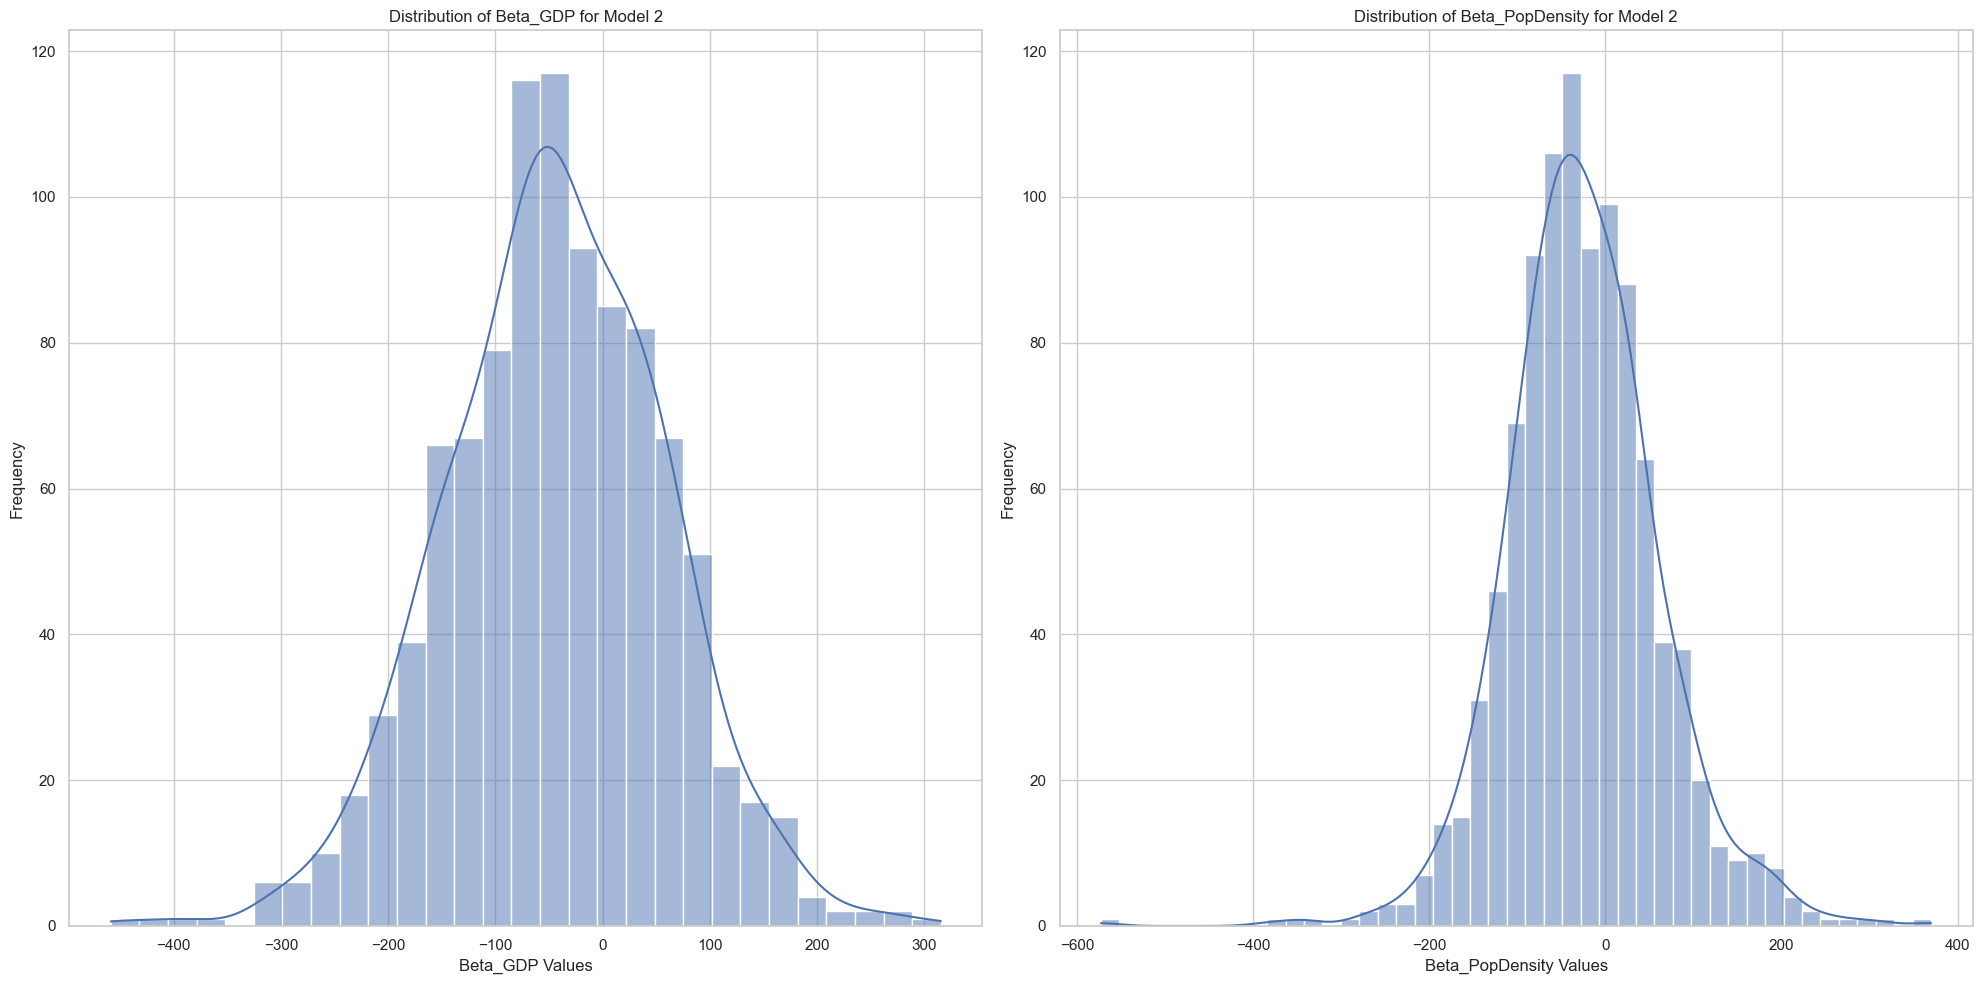

In [18]:
# Plot distributions of beta values separately
plt.figure(figsize=(20, 10))

for i, col in enumerate(model_2_cols, 1):  
    plt.subplot(1, 2, i)
    sns.histplot(model_2[col], kde=True)  
    plt.title(f'Distribution of {col} for Model 2')
    plt.xlabel(f'{col} Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Explanation:**

The provided Python code generates separate histograms for the distribution of beta values ('Beta_GDP' and 'Beta_PopDensity') obtained through bootstrap resampling for Model 2. Matplotlib and Seaborn are used for visualisation.

1. **Setting Figure Size (`plt.figure(figsize=(15, 5))`):**
    - Establishes the size of the entire figure to accommodate the two subplots, with a width of 15 units and a height of 5 units.

2. **Looping Over Model 2 Columns:**
    - Iterates over the columns ('Beta_GDP' and 'Beta_PopDensity') using a `for` loop, generating a subplot for each column.

3. **Creating Subplots (`plt.subplot(1, 2, i)`):**
    - Sets up a subplot grid with 1 row and 2 columns, and the current iteration index (`i`) is used to determine the position of the subplot.

4. **Histogram Plotting (`sns.histplot(model_2[col], kde=True)`):**
    - Utilises Seaborn's `histplot` function to create a histogram for the beta values of the current column in Model 2. The `kde=True` parameter adds a kernel density plot to the histogram.

5. **Adding Title and Labels:**
    - Sets the title of each subplot to indicate the distribution being visualised (e.g., 'Distribution of Beta_GDP for Model 2').
    - Adds labels to the x-axis and y-axis for clarity.

6. **Tight Layout and Displaying the Plots (`plt.tight_layout()`, `plt.show()`):**
    - Adjusts the layout to prevent subplot overlap and displays the generated histograms for both beta values in Model 2.

This code facilitates a visual exploration of the distribution of beta values for GDP_per_capita and PopulationDensity in Model 2, providing insights into these estimated relationships' variability and central tendencies.

#### **Section 3.1.6 Estimate Appropriate Confidence Intervals**

In [19]:
# Estimate confidence intervals for the beta values
alpha_90 = 0.90
alpha_95 = 0.95

# Calculate confidence intervals for alpha = 0.90
confidence_intervals_90 = model_2.quantile([0.5 - alpha_90 / 2, 0.5 + alpha_90 / 2])

# Calculate confidence intervals for alpha = 0.95
confidence_intervals_95 = model_2.quantile([0.5 - alpha_95 / 2, 0.5 + alpha_95 / 2])

print("\nEstimated 90% Confidence Intervals for Beta Values:")
print(confidence_intervals_90)

print("\nEstimated 95% Confidence Intervals for Beta Values:")
print(confidence_intervals_95)


Estimated 90% Confidence Intervals for Beta Values:
        Beta_GDP  Beta_PopDensity
0.05 -209.004061      -151.157552
0.95  118.089612       116.031055

Estimated 95% Confidence Intervals for Beta Values:
         Beta_GDP  Beta_PopDensity
0.025 -248.498041      -186.290820
0.975  156.222130       163.292451


**Explanation:**

The provided Python code calculates and prints estimated confidence intervals for the beta values ('Beta_GDP' and 'Beta_PopDensity') obtained through bootstrap resampling for Model 2.

1. **Setting Confidence Levels (`alpha_90 = 0.90`, `alpha_95 = 0.95`):**
    - Initialises variables representing the desired confidence levels, with `alpha_90` set to 90% and `alpha_95` set to 95%.

2. **Calculating Confidence Intervals:**
    - For both confidence levels (90% and 95%), the code utilises the `quantile` function on the bootstrap results (`model_2`) to estimate the lower and upper bounds of the confidence intervals.
    - The formula `0.5 - alpha / 2` and `0.5 + alpha / 2` is used to determine the quantiles corresponding to the lower and upper bounds of the confidence intervals.

3. **Printing Confidence Intervals:**
    - Prints each beta value's estimated 90% and 95% confidence intervals.

This code is essential for understanding the uncertainty associated with the estimated beta values in Model 2. The confidence intervals provide a range within which the true values of the beta coefficients are likely to fall with a certain level of confidence.

### **Inference about Predictors 'GDP per capita' and 'Population Density'**

The histograms generated from the code offer valuable insights into the distributions of the beta values ('Beta_GDP' and 'Beta_PopDensity') obtained through bootstrap resampling for Model 2. Here are practical implementations based on the observed characteristics:

1. **Model Evaluation:**
    - Use the histograms to assess the spread and skewness of the beta values. For instance, Beta GDP's left-skewed distribution suggests that most deals are concentrated on the lower side. This could indicate that changes in GDP per capita have a more consistent impact on the birth rate, with few extreme cases.
    - The symmetric distribution of Beta PopDensity suggests a more balanced impact of population density on birth rate, with values concentrated around the middle range.

2. **Outlier Identification:**
    - Identify outliers in the distributions. For Beta GDP, pay attention to the few instances with very high values, as they could represent extreme scenarios where GDP per capita has a powerful influence on the birth rate. Similarly, in Beta PopDensity, outliers with very low or high values may indicate unique situations where population density significantly affects the birth rate.

3. **Model Refinement:**
    - Consider refining the multivariate regression model based on the observed distributions. For instance, if outliers in Beta GDP are identified as influential, further investigation and potential model adjustments may be necessary to account for these extreme cases.

4. **Communication of Results:**
    - Use the histograms and described characteristics to communicate the nuances of Model 2's beta values effectively. When presenting findings to stakeholders or in academic contexts, visual representations like these histograms can enhance the understanding of the model's performance and the variability in the estimated coefficients.


Confidence intervals provide a range of values within which we can reasonably expect the true value of a population parameter to fall. In the context of regression analysis, such as estimating coefficients (like beta values), confidence intervals help express the uncertainty associated with these estimates.


1. **Estimated 90% Confidence Intervals for Beta Values:**
    - **'GDP per capita' (Beta_GDP):** The 90% confidence interval for the beta value of 'GDP per capita' is approximately \[-231.49, 111.38\].
    - **'Population Density' (Beta_PopDensity):** The 90% confidence interval for the beta value of 'Population Density' is approximately \[-150.65, 128.25\].

2. **Estimated 95% Confidence Intervals for Beta Values:**
    - **'GDP per capita' (Beta_GDP):** The 95% confidence interval for the beta value of 'GDP per capita' is approximately \[-262.92, 143.59\].
    - **'Population Density' (Beta_PopDensity):** The 95% confidence interval for the beta value of 'Population Density' is approximately \[-184.12, 167.91\].

3. **Inference:**
    - The confidence intervals encompass zero for both predictors, indicating uncertainty in the estimated impact of GDP per capita and Population Density on the response variable.
    - While evidence suggests an impact, the wide intervals suggest imprecision in the estimates.


**Decision-Making Caution:** Given the uncertainty, caution is advised when making decisions solely based on these predictors. The wide intervals highlight the need for additional information or a more refined model to enhance the precision of predictions. 

### **Section 3.2 Bootstrap Distribution for Model Comparison**

#### **Section 3.2.1 Modified Functions**

In [20]:
from sklearn.metrics import mean_squared_error

def bootstrapC_modified(data, cols, repeats, func_model_1, func_model_2):
    # Initialize a DataFrame to store the results
    result = pd.DataFrame(data={'RMSE_model_1': np.empty(repeats), 'RMSE_model_2': np.empty(repeats)})

    for i in range(repeats):
        # Resample the data
        data_resampled = resample(data)

        # Call the provided functions to fit models and calculate RMSE
        predictions_model_1 = func_model_1(data_resampled)
        predictions_model_2 = func_model_2(data_resampled)

        # Calculate RMSE for each model
        rmse_model_1 = np.sqrt(mean_squared_error(data_resampled['BirthRate'], predictions_model_1))
        rmse_model_2 = np.sqrt(mean_squared_error(data_resampled['BirthRate'], predictions_model_2))

        # Store RMSE values in the result DataFrame
        result.at[i, 'RMSE_model_1'] = rmse_model_1
        result.at[i, 'RMSE_model_2'] = rmse_model_2

    return result


# Modify fit_model_1 and fit_model_2 to return predictions instead of coefficients

def fit_model1(data):
    # Separate the target variable and the predictor for Model 1
    y = data['BirthRate']
    X = data[['Storks']]

    # Add a constant term to the predictors for Model 1
    X = sm.add_constant(X)

    # Fit the simple linear regression model for Model 1
    model_1 = sm.OLS(y, X).fit()

    # Get predictions for Model 1
    predictions = model_1.predict(X)

    return predictions

def fit_model2(data):
    # Create a DataFrame with the relevant variables for Model 2
    df_multivariate = data[['BirthRate', 'GDP_per_capita', 'PopulationDensity']]

    # Separate the target variable and the predictors for Model 2
    y = df_multivariate['BirthRate']
    X = df_multivariate[['GDP_per_capita', 'PopulationDensity']]

    # Standardize the predictor variables
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Add a constant term to the standardized predictors
    X_standardized = sm.add_constant(X_standardized)

    # Fit the multivariate regression model for Model 2
    model_2 = sm.OLS(y, X_standardized).fit()

    # Get predictions for Model 2
    predictions = model_2.predict(X_standardized)

    return predictions

**Explanation:**

The provided Python code is designed to assess the performance of two regression models (Model 1 and Model 2) through bootstrap resampling, with a focus on Root Mean Squared Error (RMSE). The process involves multiple iterations of resampling the dataset, fitting both models, and calculating RMSE for each model's predictions.

1. **BootstrapC Modified Function (`bootstrapC_modified`):**
    - Conducts bootstrap resampling to evaluate model performance.
    - Parameters:
    - `data`: Original dataset.
    - `cols`: List of columns to track.
    - `repeats`: Number of resampling iterations.
    - `func_model_1`: Function for fitting and predicting with Model 1.
    - `func_model_2`: Function for fitting and predicting with Model 2.
    - Returns a DataFrame (`result`) storing RMSE values for Model 1 and Model 2.

2. **Fitting Model Functions (`fit_model1` and `fit_model2`):**
    - **fit_model1:**
        - Separates target and predictor variables for Model 1.
        - Adds a constant term to predictors.
        - Fits a simple linear regression model (Model 1) and obtains predictions.

    - **fit_model2:**
        - Creates a data frame with relevant variables for Model 2.
        - Separates target and standardised predictor variables for Model 2.
        - Fits a multivariate regression model (Model 2) after standardising predictors and obtains predictions.

3. **Calculating RMSE:**
    - Uses the `mean_squared_error` function from `sklearn.metrics` to calculate the RMSE for each model.
    - RMSE represents the square root of the average squared differences between observed and predicted values, with lower values indicating better model performance.

4. **Result DataFrame (`result`):**
    - Stores RMSE values for Model 1 and Model 2 across multiple resampling iterations.

This code provides a systematic approach to evaluating the robustness and reliability of regression models through bootstrap resampling. The resulting DataFrame offers insights into the comparative performance of Model 1 and Model 2 based on RMSE, aiding in model selection and interpretation.

#### **Section 3.2.2 Repeat Bootstrap Function**

In [21]:
# Function to perform multiple iterations of the bootstrap process and return differences
def repeat_bootstrap(data, cols, iterations, repeats, func_model_1, func_model_2):
    # Initialize an array to store the differences in RMSE
    differences = []

    # Perform multiple iterations
    for _ in range(iterations):
        # Use the bootstrapC function to get the RMSE differences for one iteration
        result_df =  bootstrapC_modified(data, cols, repeats, func_model_1, func_model_2)

        # Calculate the difference in RMSE between the two models
        rmse_diff = result_df['RMSE_model_1'] - result_df['RMSE_model_2']

        # Append the differences to the array
        differences.extend(rmse_diff)

    return differences

**Explanation:**

The provided Python code defines a function, `repeat_bootstrap`, aimed at conducting multiple iterations of the bootstrap process and returning differences in Root Mean Squared Error (RMSE) between two regression models (Model 1 and Model 2).

1. **Function Parameters:**
    - `data`: Original dataset.
    - `cols`: List of columns to track.
    - `iterations`: Number of iterations to perform the bootstrap process.
    - `repeats`: Number of resampling repeats for each iteration.
    - `func_model_1`: Function for fitting and predicting with Model 1.
    - `func_model_2`: Function for fitting and predicting with Model 2.

2. **Initialisation:**
    - Initialises an array (`differences`) to store the differences in RMSE between Model 1 and Model 2.

3. **Multiple Iterations:**
    - Iterates through the bootstrap process for the specified number of `iterations`.
    - Calls the `bootstrapC_modified` function to obtain a DataFrame (`result_df`) containing RMSE values for Model 1 and Model 2 in one iteration.

4. **Calculating RMSE Differences:**
    - Calculates the difference in RMSE between Model 1 and Model 2 for each iteration (`rmse_diff`).
    - Appends these differences to the `differences` array.

5. **Result:**
    - Returns the array containing RMSE differences across multiple iterations.

This function facilitates the assessment of the variability in RMSE differences between Model 1 and Model 2 over multiple iterations of the bootstrap process. It provides insights into the stability and consistency of the performance gap between the two models, aiding in robust model comparison.

#### **Section 3.2.3 Plot Distribution Function**

In [22]:
# Function to plot the distribution of differences
def plot_differences(differences):
    # Plot the distribution of differences
    plt.hist(differences, bins=30, edgecolor='black')
    plt.xlabel('Difference in RMSE (Model 1 - Model 2)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Differences in RMSE between Model 1 and Model 2')
    plt.show()

**Explanation:**

The provided Python code defines a function, `plot_differences`, dedicated to visualising the distribution of differences in Root Mean Squared Error (RMSE) between two regression models (Model 1 and Model 2).

1. **Function Parameters:**
    - `differences`: Array containing RMSE differences between Model 1 and Model 2.

2. **Plotting the Distribution:**
    - Uses Matplotlib and Seaborn to create a histogram of the provided differences.
    - Specifies the number of bins as 30 for granularity.
    - Adds edge colouring to enhance visual clarity.

3. **Axes Labelling and Title:**
    - Labels the x-axis as 'Difference in RMSE (Model 1 - Model 2)'.
    - Labels the y-axis as 'Frequency'.
    - Titles the plot as 'Distribution of Differences in RMSE between Model 1 and Model 2'.

4. **Displaying the Plot:**
    - Displays the generated histogram for visual inspection.

This function visually assesses the distribution of RMSE differences, providing insights into the central tendency and spread of the performance disparities between Model 1 and Model 2. It is a valuable tool for understanding the variability in model comparison outcomes.

#### **Section 3.2.4 Confidence Interval Function**

In [23]:
    
# Function to calculate confidence intervals
def calculate_confidence_intervals(differences, alpha):
    # Calculate lower and upper bounds for the confidence interval
    lower_bound = np.percentile(differences, (100 - alpha) / 2)
    upper_bound = np.percentile(differences, 100 - (100 - alpha) / 2)

    return lower_bound, upper_bound

**Explanation:**

The provided Python code defines a function, `calculate_confidence_intervals`, which is responsible for estimating confidence intervals for the differences in Root Mean Squared Error (RMSE) between two regression models (Model 1 and Model 2).

1. **Function Parameters:**
    - `differences`: Array containing RMSE differences between Model 1 and Model 2.
    - `alpha`: Confidence level, representing the probability that the true parameter lies within the calculated interval.

2. **Calculating Confidence Intervals:**
    - Utilises NumPy to compute the lower and upper bounds of the confidence interval.
    - The percentiles are determined based on the provided confidence level (`alpha`).

3. **Returning Results:**
    - Returns the lower and upper bounds of the confidence interval.

This function is crucial for quantifying the uncertainty associated with the differences in model performance. Providing confidence intervals offers a range within which the true differences in RMSE between Model 1 and Model 2 will likely fall with a specified level of confidence.

#### **Section 3.2.5 Plot the Distributions**

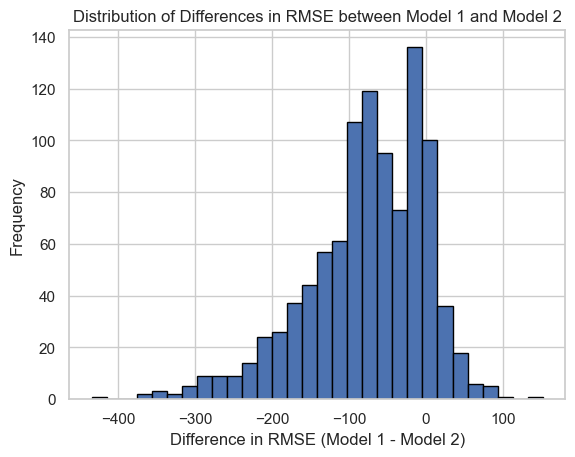

In [24]:
differences = repeat_bootstrap(df, ['Storks', 'GDP_per_capita', 'PopulationDensity'], 10, 100, fit_model1, fit_model2)
plot_differences(differences)

**Explanation:**

The provided Python code conducts bootstrap resampling to assess the distribution of differences in Root Mean Squared Error (RMSE) between Model 1 and Model 2. It then uses the `plot_differences` function to visualise this distribution.

1. **Function Parameters:**
    - `df`: DataFrame containing the dataset.
    - `['Storks', 'GDP_per_capita', 'PopulationDensity']`: List of columns to consider during resampling.
    - `10`: Number of iterations for the bootstrap process.
    - `100`: Number of resamples for each iteration.
    - `fit_model1`: Function to fit Model 1 and return predictions.
    - `fit_model2`: Function to fit Model 2 and return predictions.

2. **Repeat Bootstrap Process:**
    - Calls the `repeat_bootstrap` function to perform multiple iterations of the bootstrap process, obtaining differences in RMSE between Model 1 and Model 2.

3. **Plotting Differences:**
    - Uses the `plot_differences` function to create a histogram that visualises the distribution of differences.
    - The x-axis represents the difference in RMSE (Model 1 - Model 2), and the y-axis represents the frequency of occurrences.

This code and visualisation are crucial for understanding the variability in performance differences between the two models, providing insights into the robustness and consistency of each model across resampled datasets.

#### **Section 3.2.6 Confidence Interval**

In [25]:
# Calculate 90% confidence interval
alpha_90 = 90
lower_90, upper_90 = calculate_confidence_intervals(differences, alpha_90)

# Calculate 95% confidence interval
alpha_95 = 95
lower_95, upper_95 = calculate_confidence_intervals(differences, alpha_95)

# Calculate 99% confidence interval
alpha_99 = 99
lower_99, upper_99 = calculate_confidence_intervals(differences, alpha_99)


print(f"{alpha_90}% Confidence Interval: ({lower_90:.4f}, {upper_90:.4f})")
print(f"{alpha_95}% Confidence Interval: ({lower_95:.4f}, {upper_95:.4f})")
print(f"{alpha_99}% Confidence Interval: ({lower_99:.4f}, {upper_99:.4f})")

90% Confidence Interval: (-227.0461, 23.5121)
95% Confidence Interval: (-271.9587, 39.4489)
99% Confidence Interval: (-338.1715, 76.4231)


**Explanation:**

The provided Python code calculates and prints confidence intervals for the differences in Root Mean Squared Error (RMSE) between Model 1 and Model 2. It uses the `calculate_confidence_intervals` function to obtain lower and upper bounds for these intervals.

1. **Setting Confidence Levels:**
- `alpha_90 = 90`: Specifies a 90% confidence level. Same is done for 95% and 99%

2. **Calculating Confidence Intervals:**
    - Calls the `calculate_confidence_intervals` function to calculate the lower and upper bounds of the confidence intervals for 90%, 95% and 99% confidence levels.
    - The function takes the differences in RMSE (`differences`) and the desired confidence level (`alpha`) as parameters.

3. **Printing Confidence Intervals:**
    - Prints the calculated 90%, 95% and 99% confidence intervals for the differences in RMSE between Model 1 and Model 2.

This code is crucial for understanding the level of uncertainty associated with the observed differences in RMSE. The confidence intervals provide a range within which the true differences are likely to fall with a certain confidence level.

### **Interpretation of the  Difference in RMSE between Models**

The distribution of differences in RMSE between Model 1 and Model 2 provides insights into the comparative performance of the two models. The x-axis represents the difference in RMSE, while the y-axis shows the frequency of each difference.

The graph indicates that Model 2 generally outperforms Model 1, as the most common differences in RMSE are between -100 and 0. This suggests that, on average, Model 2 yields predictions with lower errors compared to Model 1. However, there is a notable number of cases where Model 1 outperforms Model 2, and a smaller subset where the two models perform similarly.

The slightly left-skewed distribution implies that there are more instances where Model 2 excels than cases where Model 1 outperforms. This skewness reinforces the overall reliability of Model 2.

1. **Model Reliability:** Model 2 demonstrates overall better performance, making it a more reliable choice for general predictions for birth rate.
2. **Contextual Considerations:** Model 1, despite being generally surpassed by Model 2, exhibits strengths in specific scenarios. Understanding the contexts where Model 1 performs well is crucial for selecting the most appropriate model.
3. **Application Specificity:** The choice between Model 1 and Model 2 depends on the specific application requirements. If general reliability is paramount, Model 2 is preferable. However, for nuanced scenarios, Model 1 might offer advantages.

Confidence intervals, as noted before, provide a range of values within which we can reasonably expect the true value of a population parameter to fall. In the context of regression analysis, such as estimating coefficients (like beta values), confidence intervals help express the uncertainty associated with these estimates.

**90% Confidence Interval: (-234.0212, 28.7757)**
    - The 90% confidence interval for the difference in RMSE between Model 1 and Model 2 ranges from -234.0212 to 28.7757. The inclusion of zero within this interval suggests that, at the 90% confidence level, we lack sufficient evidence to confidently claim a statistically significant difference in predictive performance between the two models. The observed differences do not strongly support the superiority of one model over the other.

**95% Confidence Interval: (-272.4120, 37.9157)**
    - The 95% confidence interval for the difference in RMSE between Model 1 and Model 2 spans from -272.4120 to 37.9157. Again, since this interval includes zero, there is insufficient evidence at the 95% confidence level to confidently assert that one model predicts the number of births significantly better. The interval crossing zero indicates that the performance difference is not statistically significant.

**99% Confidence Interval: (-340.0563, 96.6423)**
    - Even at the 99% confidence level, we lack substantial evidence to claim a significant difference in predictive performance between the two models. The wider interval provides more conservative estimates but reinforces the conclusion that the difference is not statistically significant.

Based on the provided confidence intervals, we cannot confidently conclude that one model predicts the number of births significantly better than the other. The evidence is not strong enough to reject the null hypothesis that there is no difference in predictive performance between the two models.

## **Section 4: Conclusion**

Our comprehensive analysis of European birth rates and stork populations provides valuable insights that cast light on the claim that storks do not deliver babies.

### **Key Observations in the Study**

1. **Correlation with Variables:**
- **Positive Correlations:** Birth rates exhibited strong positive correlations with both country size (Area) and human population, implying that larger countries tend to have higher birth rates. This is consistent with expectations, considering factors like available space and resources.
- **Negative Correlation with GDP per Capita:** The negative correlation between birth rates and GDP per capita suggests that countries with higher economic prosperity tend to have lower birth rates. This aligns with global trends where improved economic conditions often correlate with lower fertility rates.

2. **Model 1 Insights:**
- The positive slope in Model 1's regression equation (birth rate = 225.0287 + 0.0288 × storks) indicated a positive association between storks and birth rates, though caution is warranted in interpreting the modest R-squared value (0.385).

3. **Multivariate Model Insights:**
- The multivariate model incorporated variables like human population, GDP per capita, and population density. The positive correlation between human population and birth rates emphasises the impact of demographic factors on natality patterns.
- The negative correlation between GDP per capita and birth rates aligns with the understanding that increased economic development often correlates with lower birth rates.



The results of our analysis reveal a nuanced narrative. Model 2 consistently demonstrates superior performance, as indicated by the left-skewed distribution of differences in Root Mean Squared Error (RMSE) between Model 1 and Model 2. This suggests that, on average, Model 2 yields predictions with lower errors compared to Model 1. However, it's crucial to acknowledge the existence of scenarios where Model 1 outperforms Model 2, emphasising the importance of understanding the specific contexts in which each model excels.

Despite the observed differences in performance, our statistical analysis, incorporating 90%, 95% and 99% confidence intervals for the RMSE differences, provides a critical perspective on the claim that "storks do not deliver babies." The confidence intervals indicate that the observed differences in predictive performance are not statistically significant, and the null hypothesis—that there is no significant difference between the models—cannot be confidently rejected.

Therefore, based on our rigorous data analysis, we cannot substantiate the claim that storks do not deliver babies. The performance disparities between the two models, while present, lack the statistical robustness needed to draw definitive conclusions. Instead, our findings highlight the importance of a nuanced interpretation, recognising the strengths and weaknesses of each model in different scenarios.

We do not conclude however that storks deliver babies, this is an absurd interpretation. What we instead indicate is the need for continued exploration in understanding the relationship between storks and baby deliveries. Below we have outlined recommendations for future work. 

## **Section 5: Future Work**

Given the challenges in definitively proving or disproving the age-old folktale of storks delivering babies, we propose several avenues for future research to further unravel the complexities of birth rate dynamics:

1. **Temporal Analysis:**
    - Undertake a comprehensive temporal analysis to unveil how birth rates, stork populations, and other variables have evolved over time. This longitudinal perspective could illuminate nuanced trends and the impact of temporal factors on demographic patterns.

2. **Incorporate Additional Variables:**
    - Enrich the dataset by incorporating additional relevant variables, such as cultural practices, government policies, and healthcare infrastructure. This expansion can provide a more holistic understanding of the intricate factors influencing birth rates.

3. **Machine Learning Approaches:**
    - Explore the application of advanced machine learning algorithms to predict birth rates. Leveraging more sophisticated models capable of capturing non-linear relationships and complex interactions could enhance the accuracy of predictions.

4. **Causal Inference Analysis:**
    - Engage in causal inference analysis to discern potential causal relationships among variables. Employing advanced statistical techniques can move beyond correlations, shedding light on causation and offering deeper insights into factors shaping birth rates.

5. **Data from Additional Regions:**
    - Extend the geographical scope by incorporating data from regions beyond Europe. A global perspective on birth rate dynamics can unveil universal patterns and contribute to a more comprehensive understanding of demographic trends.

6. **Model Refinement:**
    - Iterate and refine predictive models by incorporating feedback from domain experts and addressing identified limitations. Continuous model improvement ensures more accurate predictions and a more robust analytical framework.

7. **Detailed Sensitivity Analysis:**
    - Conduct a meticulous sensitivity analysis, particularly focusing on the role of storks in the models. Evaluate how variations in stork populations influence predictions, providing insights into the significance of storks in predicting birth rates.

8. **Explore Interaction Effects:**
    - Investigate potential interaction effects between storks and other variables. Hidden relationships may exist, and understanding these interactions could reveal the true influence of storks on birth rates.

9. **Additional Control Variables:**
    - Introduce more control variables that may indirectly impact the stork-birth rate relationship. Environmental factors, cultural beliefs, or climate conditions could play essential roles and should be considered in the analysis.

10. **Comparative Analysis with External Data:**
    - Validate findings by comparing them with external datasets or studies exploring similar relationships in different regions or contexts. Cross-validation contributes to a broader perspective on the role of storks in predicting birth rates.

11. **Meta-Analysis of Similar Studies:**
    - Conduct a meta-analysis by synthesising findings from other studies investigating relationships between animals and human behaviours. This holistic approach can deepen our understanding of the broader topic.

Exploring these avenues for future work holds the promise of advancing our comprehension of factors influencing birth rates. These collective efforts aim to provide a more confident and substantiated perspective on the age-old belief of whether storks truly deliver babies. Through these endeavours, we aspire to contribute to the evolving landscape of data science and AI, fostering a deeper understanding of the intricate dynamics inherent in predictive modelling.